<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [ ]:
#Importation de la librairie Pandas
import pandas as pd

In [ ]:
#Importation de la librairie plotly express
import plotly.express as px


In [ ]:
#Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe
#Saisir, dans Google, les mots clés "display all columns dataframe Pandas", par exemple.
#Dans les résultats de la recherche, privilégiez les solutions provenants de Stack Overflow ou Medium
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [ ]:
#Importation du fichier web.xlsx
df_web = pd.read_excel("web.xlsx")
#Importation du fichier erp.xlsx
df_erp = pd.read_excel("erp.xlsx")
#Importation du fichier liaison.xlsx
df_liaison = pd.read_excel("liaison.xlsx")

/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

In [ ]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 6 colonne(s)


In [ ]:
#Consulter le nombre de colonnes
print("Nombre de colonnes :")
print(len(df_erp.columns))

#La nature des données dans chacune des colonnes
print("\nNature des données :")
print(df_erp.dtypes)

#Le nombre de valeurs présentes dans chacune des colonnes
print("\nNombre de valeurs présentes par colonne :")
print(df_erp.count())

Nombre de colonnes :
6

Nature des données :
product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
purchase_price    float64
dtype: object

Nombre de valeurs présentes par colonne :
product_id        825
onsale_web        825
price             825
stock_quantity    825
stock_status      825
purchase_price    825
dtype: int64


In [ ]:
#Afficher les 5 premières lignes de la table
df_erp.head()


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,outofstock,23.77


In [ ]:
#Vérifier si il y a les lignes en doublons dans la colonne product_id
nombre_doublons = df_erp['product_id'].duplicated().sum()
print(f"Nombre de lignes en doublon dans product_id : {nombre_doublons}")


Nombre de lignes en doublon dans product_id : 0


In [ ]:
#Afficher les valeurs distinctes de la colonne stock_status
print("Liste des valeurs distinctes :")
print(df_erp['stock_status'].unique())

#À quelle(s) autre(s) colonne(s) sont-elles liées ?
# -> onsale_web et stock_quantity

# Création d'un tableau croisé dynamique
tableau_dynamique = df_erp.pivot_table(
    values=['onsale_web', 'price', 'purchase_price', 'stock_quantity'],
    index='stock_status',
    aggfunc='mean'
)
print()
tableau_dynamique

Liste des valeurs distinctes :
['instock' 'outofstock']



,onsale_web,price,purchase_price,stock_quantity
stock_status,,,,
instock,0.911323,32.194816,16.913956,24.309686
outofstock,0.521739,32.130978,17.152717,-0.086957


In [ ]:
#Création d'une colonne "stock_status_2
#La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
#si la valeur de la colonne "stock_quantity" est nulle renseigner "outofstock" sinon mettre "instock"
df_erp['stock_status_2'] = df_erp['stock_quantity'].apply(lambda x: 'outofstock' if x <= 0 else 'instock')

In [ ]:
#Vérifions que les 2 colonnes sont identiques:
#Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2
#La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:
df_erp["stock_status"] == df_erp["stock_status_2"]

#Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
#C'est un bon début, mais difficile à exploiter

,0
0,True
1,True
2,True
3,True
4,False
5,True
6,True
7,True
8,True
9,True


In [ ]:
#Mais il est possible de synthétiser ce résultat en effectuant la somme de cette colonne:
#True vaut 1 et False 0
#Nous devrions obtenir la somme de 824 qui correspond au nombre de lignes dans ce dataset
(df_erp["stock_status"] == df_erp["stock_status_2"]).sum()

823

In [ ]:
#Si les colonnes ne sont absolument pas identiques ligne à ligne alors identifier la ligne en écart
##Dans ce cas je vous ce lien pour apprendre à réaliser des filtres dans Pandas:
##https://bitbucket.org/hrojas/learn-pandas/src/master/
##Lesson 3
df_erp[df_erp["stock_status"] != df_erp["stock_status_2"]]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
4,4039,1,46.0,3,outofstock,23.77,instock
398,4885,1,18.7,0,instock,9.66,outofstock


In [ ]:
#Corriger la ou les données incohérentes
df_erp['stock_status'] = df_erp['stock_quantity'].apply(lambda x: 'outofstock' if x <= 0 else 'instock')

#Verification en utilisant le même code que plus haut pour afficher les problemes
df_erp[df_erp["stock_status"] != df_erp["stock_status_2"]]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [ ]:
###############
## LES PRIX  ##
###############

#Vérification des prix: Y a t-il des prix non renseignés, négatif ou nul?
#Afficher le ou les prix non renseignés dans la colonne "price"
nb_prix_non_renseignes = df_erp["price"].isna().sum()
print("Nombre d'articles avec un prix non renseigné : {}".format(nb_prix_non_renseignes)) #Saisir l'instruction manquante dans la fonction format

#Afficher le prix minimum de la colonne "price"
prix_min = df_erp["price"].min()
print(f"Prix minimum : {prix_min:.2f} €")

#Afficher le prix maximum de la colonne "price"
prix_max = df_erp["price"].max()
print(f"Prix maximum : {prix_max:.2f} €")
print()
#Affichier les prix inférieurs à 0 (qu'est ce qu'il faut en faire ?)
prix_negatifs = df_erp[df_erp["price"] < 0]
prix_negatifs


Nombre d'articles avec un prix non renseigné : 0
Prix minimum : -20.00 €
Prix maximum : 225.00 €



,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
151,4233,0,-20.0,0,outofstock,10.33,outofstock
469,5017,0,-8.0,0,outofstock,4.34,outofstock
739,6594,0,-9.1,19,instock,4.61,instock


In [ ]:
# Correction des prix négatifs en prenant leur valeur absolue
df_erp["price"] = df_erp["price"].abs()

# Vérification après correction
print(f"Prix minimum après correction : {df_erp['price'].min():.2f} €")

Prix minimum après correction : 5.20 €


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [ ]:
#######################
### stock_quantity  ###
#######################

#Vérification de la colonne stock quantity
#Afficher la quantité minimum de la colonne "stock_quantity"
quantite_min = df_erp["stock_quantity"].min()
print(f"Quantité minimum : {quantite_min}")

#Afficher la quantité maximum de la colonne "stock_quantity"
quantite_max = df_erp["stock_quantity"].max()
print(f"Quantité maximum : {quantite_max}")

#Affichier les stocks inférieurs à 0 (qu'est ce qu'il faut en faire ?)
stocks_negatifs = df_erp[df_erp["stock_quantity"] < 0]
stocks_negatifs



Quantité minimum : -10
Quantité maximum : 145


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
449,4973,0,10.0,-10,outofstock,4.96,outofstock
573,5700,1,44.5,-1,outofstock,22.30,outofstock


In [ ]:
# Correction des stocks négatifs en fonction de la valeur de onsale_web
df_erp['stock_quantity'] = df_erp.apply(
    lambda row: abs(row['stock_quantity']) if row['stock_quantity'] < 0 and row['onsale_web'] == 1 else (0 if row['stock_quantity'] < 0 and row['onsale_web'] == 0 else row['stock_quantity']),
    axis=1
)

correction_stocks = df_erp.iloc[[449, 573]]
correction_stocks

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
449,4973,0,10.0,0,outofstock,4.96,outofstock
573,5700,1,44.5,1,outofstock,22.30,outofstock


In [ ]:
# Graphique répartition des stocks
fig = px.box(df_erp, y="stock_quantity", title="Répartition des stocks")
fig.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [ ]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient? Que signifient-elles?
print("Liste des valeurs de la colonne onsale_web:")
print(df_erp['onsale_web'].unique())

# 1 -> Produit en vente sur le site web
# 0 -> Produit non disponible à la vente sur le site web

Liste des valeurs de la colonne onsale_web:
[1 0]


In [ ]:
#Quelles sont les colonnes à conserver selon vous?

#product_id -> Identifiant unique du produit
#onsale_web -> Indique si le produit est en vente sur le site web
#price -> Prix de vente du produit
#stock_quantity -> Quantité de stock disponible
#stock_status -> Indique si le produit est en stock ou non
#purchase_price -> Prix d'achat du produit


In [ ]:
#Supprimer la colonne comportant le libellé "stock_status_2" car elle est redondante
#avec la colonne "stock_status".
df_erp = df_erp.drop("stock_status_2", axis=1)

In [ ]:
#Vérification du dataframe après la supression de la colonne "stock_status_2"
df_erp.columns

Index(['product_id', 'onsale_web', 'price', 'stock_quantity', 'stock_status',
       'purchase_price'],
      dtype='object')

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.4 - Analyse de la variable prix d'achat</h3>
</div>

In [ ]:
######################
##   prix d'achat   ##
######################

#Vérification de la colonne purchase_price :
#Afficher le ou les prix non renseignés dans la colonne "purchase_price"
nb_prix_non_renseignes = df_erp["purchase_price"].isna().sum()
print("Nombre d'articles avec un prix d'achat non renseigné : {}".format(nb_prix_non_renseignes))

#Afficher le prix minimum de la colonne "purchase_price"
prix_min = df_erp["purchase_price"].min()
print(f"Prix minimum : {prix_min:.2f} €")

#Afficher le prix maximum de la colonne "purchase_price"
prix_max = df_erp["purchase_price"].max()
print(f"Prix maximum : {prix_max:.2f} €")

Nombre d'articles avec un prix d'achat non renseigné : 0
Prix minimum : 2.74 €
Prix maximum : 137.81 €


In [ ]:
#Graphique en boite à moustache de la répartition du prix d'achat
fig = px.box(df_erp, y="purchase_price", title="Répartition du prix d'achat", labels={"purchase_price": "Prix d'Achat (€)"})

fig.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>


In [ ]:
#Dimension du dataset
#Nombre d'observations

#Nombre de caractéristiques
nb_observations, nb_caracteristiques = df_web.shape

print(f"Nombre d'observations : {nb_observations}")
print(f"Nombre de caractéristiques : {nb_caracteristiques}")

Nombre d'observations : 1513
Nombre de caractéristiques : 29


In [ ]:
#Consulter le nombre de colonnes
print(f"Nombre de colonnes : {df_web.shape[1]}")

#La nature des données dans chacune des colonnes
print("\nType de données par colonne :")
print(df_web.dtypes)

#Le nombre de valeurs présentes dans chacune des colonnes
print("\nNombre de valeurs présentes par colonne :")
print(df_web.count())

Nombre de colonnes : 29

Type de données par colonne :
sku                              object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
product_type                     object
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent              

In [ ]:
#Selon vous, quelles sont les colonnes à conserver ?
# SKU
# total_sales
# product_type
# post_title
# post_date
# post_modified

In [ ]:
#Si vous avez défini des colonnes à supprimer, effectuer l'opération
#Utilisation de .describe() pour identifier rapidement les colonnes vides ou constantes.
df_web.describe()

,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_date,post_date_gmt,post_content,post_password,post_modified,post_modified_gmt,post_content_filtered,post_parent,menu_order,comment_count
count,1513.0,1513.0,1513.0,1430.0,1430.000000,0.0,1430.000000,1430,1430,0.0,0.0,1430,1430,0.0,1430.0,1430.0,1430.0
mean,0.0,0.0,0.0,0.0,8.223077,NaN,1.998601,2018-08-22 03:22:17.090909184,2018-08-22 01:53:30.097902080,NaN,NaN,2020-06-20 13:59:29.781818112,2020-06-20 12:06:02.509090816,NaN,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,-56.000000,NaN,1.000000,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,NaN,2018-02-20 15:19:23,2018-02-20 14:19:23,NaN,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,5.000000,NaN,2.000000,2018-02-27 20:01:12.500000,2018-02-27 19:01:12.500000,NaN,NaN,2020-06-18 10:45:05.249999872,2020-06-18 08:45:05.249999872,NaN,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,8.000000,NaN,2.000000,2018-04-19 14:56:05,2018-04-19 12:56:05,NaN,NaN,2020-08-04 09:30:06,2020-08-04 07:30:06,NaN,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,11.000000,NaN,2.000000,2019-01-31 14:35:47,2019-01-31 13:35:47,NaN,NaN,2020-08-25 10:32:32,2020-08-25 08:32:32,NaN,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,122.000000,NaN,2.000000,2020-07-20 11:00:00,2020-07-20 09:00:00,NaN,NaN,2020-08-27 18:55:03,2020-08-27 16:55:03,NaN,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,6.721899,NaN,0.037385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [ ]:
#Suppression des colonnes où toutes les valeurs sont soient "NaN" soit "0"
import numpy as np
df_web = df_web.drop(df_web.columns[df_web.isin([0, np.nan]).all()], axis=1)

In [ ]:
#Nouvelle utilisation de .describe() mais cette fois en incluant les colonnes de type "object"
df_web.describe(include="object")

,sku,tax_status,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,guid,post_type,post_mime_type
count,1428,716,1429,1430,716,1430,1430,1430,1430,1430,1430,714
unique,714,1,7,713,679,1,1,1,716,1430,2,1
top,11862,taxable,Vin,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,Les eaux de vie naissent d'une subtile alchimi...,publish,closed,closed,gilles-robin-hermitage-2012,https://www.bottle-neck.fr/wp-content/uploads/...,product,image/jpeg
freq,2,716,1318,4,12,1430,1430,1430,2,1,716,714


In [ ]:
#Suppression des colonnes à valeur unique ou "NaN"

cols_a_supprimer = df_web.columns[df_web.nunique() <= 1].to_list()
cols_a_supprimer += df_web.columns[df_web.isna().all()].to_list()
df_web = df_web.drop(columns=cols_a_supprimer)

print("Colonnes supprimées : ", cols_a_supprimer)
print("Colonnes restantes : ", df_web.columns)

Colonnes supprimées :  ['tax_status', 'post_status', 'comment_status', 'ping_status', 'post_mime_type']
Colonnes restantes :  Index(['sku', 'total_sales', 'post_author', 'post_date', 'post_date_gmt',
       'product_type', 'post_title', 'post_excerpt', 'post_name',
       'post_modified', 'post_modified_gmt', 'guid', 'post_type'],
      dtype='object')


In [ ]:
#Colonnes finales à conserver
cols_a_conserver = ["sku", "total_sales", "product_type", "post_title", "post_date", "post_modified"]
df_web = df_web[cols_a_conserver]

df_web.head(5)

,sku,total_sales,product_type,post_title,post_date,post_modified
0,11862,3.0,Vin,Gilles Robin Hermitage Rouge 2012,2018-02-12 13:46:23,2019-01-31 12:12:56
1,16057,5.0,Vin,Domaine Pellé Sancerre Rouge La Croix Au Garde...,2018-04-17 15:29:17,2020-07-07 10:05:02
2,14692,5.0,Vin,Château Fonréaud Bordeaux Blanc Le Cygne 2016,2019-03-19 10:06:47,2020-04-25 21:40:31
3,16295,14.0,Vin,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,2018-02-15 14:05:06,2020-08-27 18:55:03
4,15328,2.0,Vin,Agnès Levet Côte Rôtie Maestria 2017,2019-03-27 18:05:09,2020-07-25 15:45:02


In [ ]:
#Visualisation des valeurs de la colonne sku
valeurs_sku = df_web['sku'].unique()
print(valeurs_sku)

#Quelles sont les valeurs qui ne semblent pas respecter la régle de codification?
valeurs_non_numeriques = df_web[~df_web['sku'].astype(str).apply(lambda x: x.isnumeric())]
print(valeurs_non_numeriques[['sku']])

[11862 16057 14692 16295 15328 15471 16515 16246 nan 13572 16513 16585
 16269 15526 12869 15575 11586 14338 15425 16560 15361 13809 11587 15022
 14323 16342 16029 15475 13754 14680 15875 9636 13849 13662 16564 13557
 15429 14712 15032 15481 15448 16580 15441 804 15300 13958 16071 15678
 13895 15711 12882 16053 13766 16247 12640 15292 15476 15670 16189 16038
 14864 16044 15324 15531 15953 15413 15733 14366 15895 15892 16472 15185
 16010 15793 15849 12315 15741 15934 15148 15781 15659 15106 15490 14507
 14149 16307 13736 14090 16037 15758 14661 12587 15337 15489 15201 16305
 16131 13435 15747 12203 14509 14768 16262 14561 16505 15717 16129 13460
 15871 15940 11602 13127 13520 15480 13032 15436 15269 15910 19821 16263
 15138 15146 15126 15482 16186 13905 16540 15856 15677 14700 15325 19815
 3506 16056 14975 15341 15204 15415 16065 15479 16151 15127 15140 15779
 15473 15530 14805 14106 9937 15281 16553 15315 15668 13211 15161 11258
 16296 12588 15792 15921 15690 15775 15577 15870 802 15163

In [ ]:
#Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les?
df_web[~df_web['sku'].astype(str).str.isnumeric() & df_web['sku'].notna()]

,sku,total_sales,product_type,post_title,post_date,post_modified
272,13127-1,4.0,Vin,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,2020-06-09 15:42:04,2020-07-20 17:09:06
842,bon-cadeau-25-euros,7.0,Autre,Bon cadeau de 25€,2018-06-01 13:53:46,2018-06-01 14:13:57
1117,13127-1,4.0,Vin,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,2020-06-09 15:42:04,2020-07-20 17:09:06
1387,bon-cadeau-25-euros,7.0,NaN,Bon cadeau de 25€,2018-06-01 13:53:46,2018-06-01 14:13:57


In [ ]:
#Identifier les lignes sans code articles
df_web[df_web['sku'].isna()]


,sku,total_sales,product_type,post_title,post_date,post_modified
8,NaN,NaN,NaN,NaN,NaT,NaT
20,NaN,NaN,NaN,NaN,NaT,NaT
30,NaN,NaN,NaN,NaN,NaT,NaT
37,NaN,NaN,NaN,NaN,NaT,NaT
41,NaN,NaN,NaN,NaN,NaT,NaT
47,NaN,NaN,NaN,NaN,NaT,NaT
55,NaN,NaN,NaN,NaN,NaT,NaT
75,NaN,NaN,NaN,NaN,NaT,NaT
94,NaN,NaN,NaN,NaN,NaT,NaT
127,NaN,NaN,NaN,NaN,NaT,NaT


In [ ]:
#Nombre de lignes avec des "NaN"
df_web['sku'].isna().sum()

85

In [ ]:
#Pour les codes articles identifiés, réalisé une analyse et définissez l'action à entreprendre
df_web[df_web['product_type'] == 'Autre']

# -> Vérification si il y a d'autre produits dans la catégorie "Autre"
# -> Nous conservons le sku "bon-cadeau-25-euros" car les données sont logique, il s'agit d'une carte cadeau donc le code SKU n'est pas le même qu'un spiritueux.


,sku,total_sales,product_type,post_title,post_date,post_modified
842,bon-cadeau-25-euros,7.0,Autre,Bon cadeau de 25€,2018-06-01 13:53:46,2018-06-01 14:13:57


In [ ]:
# Vérification si le produit associé au sku "13127-1" est un doublon du produit dont le sku est "13127"
filtered_skus = df_web[df_web['sku'].astype(str).str.contains('13127')]

filtered_skus[['sku', 'total_sales', 'product_type', 'post_title', 'post_date', 'post_modified']]

# -> Nous conservons le SKU "13127-1", selon les données il s'agit du même vin mais d'une année différente. Cela expliquerait le tiret.

,sku,total_sales,product_type,post_title,post_date,post_modified
123,13127,5.0,Vin,Clos du Mont-Olivet Châteauneuf-du-Pape 2012,2018-02-12 11:18:33,2020-08-24 18:25:02
272,13127-1,4.0,Vin,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,2020-06-09 15:42:04,2020-07-20 17:09:06
713,13127,5.0,Vin,Clos du Mont-Olivet Châteauneuf-du-Pape 2012,2018-02-12 11:18:33,2020-08-24 18:25:02
1117,13127-1,4.0,Vin,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,2020-06-09 15:42:04,2020-07-20 17:09:06


In [ ]:
#La clé pour chaque ligne est-elle uniques? ou autrement dit, y a-t-il des doublons?
if df_web['sku'].is_unique:
    print("Toutes les valeurs de la colonne 'sku' sont uniques.")
else:
    print("Il y a des valeurs dupliquées dans la colonne 'sku'.")

Il y a des valeurs dupliquées dans la colonne 'sku'.


In [ ]:
# Supposons que df_web est votre DataFrame
# Créons une colonne 'duplicate' pour identifier les doublons
df_web['duplicate'] = df_web.duplicated(subset='sku', keep=False)

# Filtrons le DataFrame pour ne garder que les doublons
duplicates = df_web[df_web['duplicate']].copy()

from tabulate import tabulate

count = 0  # Compteur pour les paires de doublons
max_pairs = 5  # Nombre maximum de paires à afficher

for sku, group in duplicates.groupby('sku'):
    if count < max_pairs:
        print(f"\nDoublons pour SKU: {sku}")
        # Utilisez tabulate pour afficher les doublons de manière formatée
        print(tabulate(group.head(2), headers='keys', tablefmt='psql'))
        count += 1  # Incrémente le compteur
    else:
        break  # Arrête la boucle après avoir affiché 5 paires


Doublons pour SKU: 38
+-----+-------+---------------+----------------+--------------------------------------------+---------------------+---------------------+-------------+
|     |   sku |   total_sales | product_type   | post_title                                 | post_date           | post_modified       | duplicate   |
|-----+-------+---------------+----------------+--------------------------------------------+---------------------+---------------------+-------------|
| 458 |    38 |            10 | Vin            | Emile Boeckel Crémant Brut Blanc de Blancs | 2018-04-18 12:25:58 | 2020-08-27 17:15:03 | True        |
| 964 |    38 |            10 | Vin            | Emile Boeckel Crémant Brut Blanc de Blancs | 2018-04-18 12:25:58 | 2020-08-27 17:15:03 | True        |
+-----+-------+---------------+----------------+--------------------------------------------+---------------------+---------------------+-------------+

Doublons pour SKU: 41
+------+-------+---------------+----------

In [ ]:
# Supprimez les doublons en conservant la première occurrence
df_web['duplicate'] = df_web.duplicated(subset='sku', keep='first')

# Nettoyez le DataFrame pour ne garder que la première occurrence
df_web_cleaned = df_web.drop_duplicates(subset='sku', keep='first')

df_web = df_web_cleaned.drop(columns='duplicate')

In [ ]:
#  Résumé du dataframe
df_web.info()

<class 'pandas.core.frame.DataFrame'>
Index: 715 entries, 0 to 1391
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   sku            714 non-null    object        
 1   total_sales    714 non-null    float64       
 2   product_type   714 non-null    object        
 3   post_title     714 non-null    object        
 4   post_date      714 non-null    datetime64[ns]
 5   post_modified  714 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 39.1+ KB


In [ ]:
#Les lignes sans code article semble être toutes non renseignés
#Pour s'en assurer réaliser les étapes suivantes:
#1 - Créer un dataframe avec uniquement les lignes sans code article
df_sans_sku = df_web[df_web['sku'].isna()]

#2 - utiliser la fonction df.info() sur ce nouveau dataframe pour observer le nombre de valeur reseigner dans chacune des colonnes
df_sans_sku.info()

#3 - Que constatez-vous?
#Toutes les sans SKU sont totalement vides

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 8 to 8
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   sku            0 non-null      object        
 1   total_sales    0 non-null      float64       
 2   product_type   0 non-null      object        
 3   post_title     0 non-null      object        
 4   post_date      0 non-null      datetime64[ns]
 5   post_modified  0 non-null      datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 56.0+ bytes


In [ ]:
#Suppression des lignes totalement vides
df_web = df_web.dropna(how='all', axis='rows').reset_index(drop=True)


In [ ]:
df_web = df_web.dropna(subset=['sku'], axis='rows').reset_index(drop=True)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [ ]:
#Dimension du dataset

#Nombre d'observations
#Nombre de caractéristiques

nb_observations, nb_caracteristiques = df_liaison.shape

print(f"Nombre d'observations : {nb_observations}")
print(f"Nombre de caractéristiques : {nb_caracteristiques}")


Nombre d'observations : 825
Nombre de caractéristiques : 2


In [ ]:
#Consulter le nombre de colonnes
print(f"Nombre de colonnes : {df_liaison.shape[1]}")

#La nature des données dans chacune des colonnes
print("\nType de données par colonne :")
print(df_liaison.dtypes)

#Le nombre de valeurs présentes dans chacune des colonnes
print("\nNombre de valeurs présentes par colonne :")
print(df_liaison.count())

Nombre de colonnes : 2

Type de données par colonne :
id_web        object
product_id     int64
dtype: object

Nombre de valeurs présentes par colonne :
id_web        734
product_id    825
dtype: int64


In [ ]:
#Les valeurs de la colonne "product_id" sont elles toutes uniques?
if df_liaison['product_id'].is_unique:
    print("Toutes les valeurs de la colonne 'product_id' sont uniques.")
else:
    print("Il y a des valeurs dupliquées dans la colonne 'product_id'.")

Toutes les valeurs de la colonne 'product_id' sont uniques.


In [ ]:
#Les valeurs de la colonne "id_web" sont-elles toutes uniques?
if df_liaison['id_web'].is_unique:
    print("Toutes les valeurs de la colonne 'id_web' sont uniques.")
else:
    print("Il y a des valeurs dupliquées dans la colonne 'id_web'.")

Il y a des valeurs dupliquées dans la colonne 'id_web'.


In [ ]:
## Afficher le sous-ensemble contenant les doublons
duplicates_id_web = df_liaison[df_liaison['id_web'].duplicated(keep=False)]

print(duplicates_id_web)

    id_web  product_id
19     NaN        4055
49     NaN        4090
50     NaN        4092
119    NaN        4195
131    NaN        4209
151    NaN        4233
184    NaN        4278
185    NaN        4279
234    NaN        4565
238    NaN        4577
239    NaN        4578
242    NaN        4594
246    NaN        4599
292    NaN        4659
318    NaN        4692
319    NaN        4693
320    NaN        4697
321    NaN        4698
322    NaN        4702
340    NaN        4721
352    NaN        4738
356    NaN        4744
384    NaN        4798
396    NaN        4874
416    NaN        4911
449    NaN        4973
469    NaN        5017
472    NaN        5020
486    NaN        5070
487    NaN        5075
541    NaN        5560
547    NaN        5569
618    NaN        5805
621    NaN        5808
659    NaN        5952
696    NaN        6125
724    NaN        6324
726    NaN        6327
739    NaN        6594
761    NaN        6821
762    NaN        6824
763    NaN        6825
764    NaN 

In [ ]:
#Avons-nous des articles sans correspondances?
df_liaison.isna().sum()


,0
id_web,91
product_id,0


In [ ]:
#Changement de nom pour la colonne id_web
df_liaison.rename(columns={'id_web': 'sku'}, inplace=True)

df_liaison.head(2)

,sku,product_id
0,15298,3847
1,15296,3849


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [ ]:
#Fusion des fichiers df_erp et df_liaison
df_merge = pd.merge(df_erp, df_liaison, on='product_id', how='left')

df_merge.head(5)

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,sku
0,3847,1,24.2,16,instock,12.88,15298
1,3849,1,34.3,10,instock,17.54,15296
2,3850,1,20.8,0,outofstock,10.64,15300
3,4032,1,14.1,26,instock,6.92,19814
4,4039,1,46.0,3,instock,23.77,19815


In [ ]:
#Y a t-il des lignes ne "matchant" entre les 2 fichiers?
# Filtrer les lignes où les colonnes de df_liaison ont des valeurs nulles
non_matching_rows = df_merge[df_merge['product_id'].isnull()]

# Afficher les lignes qui ne matchent pas
print(non_matching_rows)

# -> N'est pris en compte que "product_id" ici.

Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, stock_status, purchase_price, sku]
Index: []


In [ ]:
#Vérification des valeurs manquantes
df_merge.isna().sum()

,0
product_id,0
onsale_web,0
price,0
stock_quantity,0
stock_status,0
purchase_price,0
sku,91


In [ ]:
# Filtrer pour obtenir les lignes où sku est manquant
missing_sku_rows = df_merge[df_merge['sku'].isnull()]

# Afficher un échantillon de ces lignes
sample_missing_sku = missing_sku_rows.sample(n=5)  # Affiche 5 lignes au hasard
sample_missing_sku

# -> Produits sans sku sont également non disponible sur le web

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,sku
131,4209,0,73.5,0,outofstock,33.01,NaN
49,4090,0,73.0,0,outofstock,33.79,NaN
547,5569,0,19.9,1,instock,9.77,NaN
765,6864,0,40.0,32,instock,21.08,NaN
790,7010,0,47.0,37,instock,23.55,NaN


In [ ]:
# Vérification si des produits sans SKU sont disponibles sur le site internet
df_merge.loc[(df_merge['sku'].isna()) & (df_merge['onsale_web'] == 1)]

# -> 3 produits sans SKU et disponible à la vente sur le site.

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,sku
242,4594,1,144.0,0,outofstock,87.36,NaN
486,5070,1,84.7,0,outofstock,47.43,NaN
487,5075,1,43.3,0,outofstock,21.70,NaN


In [ ]:
#Conservation uniquement des lignes ou "SKU" n'est pas "NaN"
df_merge = df_merge.loc[~df_merge['sku'].isna()].copy().reset_index(drop=True)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_web</h3>
</div>

In [ ]:
#Fusionnez les datasets df_merge et df_web
df_merge_web = pd.merge(df_merge, df_web, on='sku', how='left')

df_merge_web.head(5)

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,sku,total_sales,product_type,post_title,post_date,post_modified
0,3847,1,24.2,16,instock,12.88,15298,6.0,Vin,Pierre Jean Villa Saint-Joseph Préface 2018,2018-02-08 12:58:52,2019-12-30 09:30:29
1,3849,1,34.3,10,instock,17.54,15296,9.0,Vin,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,2018-02-08 13:49:41,2019-12-21 09:00:17
2,3850,1,20.8,0,outofstock,10.64,15300,0.0,Vin,Pierre Jean Villa Crozes-Hermitage Accroche Co...,2018-02-08 14:08:36,2020-06-26 18:15:03
3,4032,1,14.1,26,instock,6.92,19814,12.0,Vin,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,2018-02-09 14:01:05,2020-01-04 16:36:01
4,4039,1,46.0,3,instock,23.77,19815,3.0,Vin,Pierre Jean Villa Côte Rôtie Carmina 2017,2018-02-12 09:04:37,2020-01-04 16:36:10


In [ ]:
#Vérification de la taille du DF
df_merge_web.shape

(734, 12)

In [ ]:
#Avons-nous des lignes sans correspondances?
df_merge_web.isna().sum()

,0
product_id,0
onsale_web,0
price,0
stock_quantity,0
stock_status,0
purchase_price,0
sku,0
total_sales,20
product_type,20
post_title,20


In [ ]:
# Affichage des 20 lignes sans correspondances via la colonne "total_sales"
df_merge_web.loc[(df_merge_web['total_sales'].isna())]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,sku,total_sales,product_type,post_title,post_date,post_modified
185,4289,0,22.8,0,outofstock,11.90,13771,NaN,NaN,NaN,NaT,NaT
227,4568,0,21.5,0,outofstock,11.22,15065,NaN,NaN,NaN,NaT,NaT
230,4584,0,32.3,0,outofstock,17.36,14785,NaN,NaN,NaN,NaT,NaT
334,4741,0,12.4,0,outofstock,6.66,12601,NaN,NaN,NaN,NaT,NaT
368,4864,0,8.3,0,outofstock,9.99,15154,NaN,NaN,NaN,NaT,NaT
371,4869,0,17.2,0,outofstock,9.33,14360,NaN,NaN,NaN,NaT,NaT
399,4921,0,13.8,0,outofstock,7.13,15608,NaN,NaN,NaN,NaT,NaT
400,4922,0,21.5,0,outofstock,10.55,15586,NaN,NaN,NaN,NaT,NaT
443,5018,0,15.4,0,outofstock,7.72,15272,NaN,NaN,NaN,NaT,NaT
445,5021,0,17.1,0,outofstock,8.92,15630,NaN,NaN,NaN,NaT,NaT


In [ ]:
#Suppression des lignes "NaN" dans la colonne "total_sales". Notre étude sera basée sur les produits disponibles à la vente sur le site web.
df_merge_web = df_merge_web.loc[~df_merge_web['total_sales'].isna()].copy().reset_index(drop=True)

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univarié des prix</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

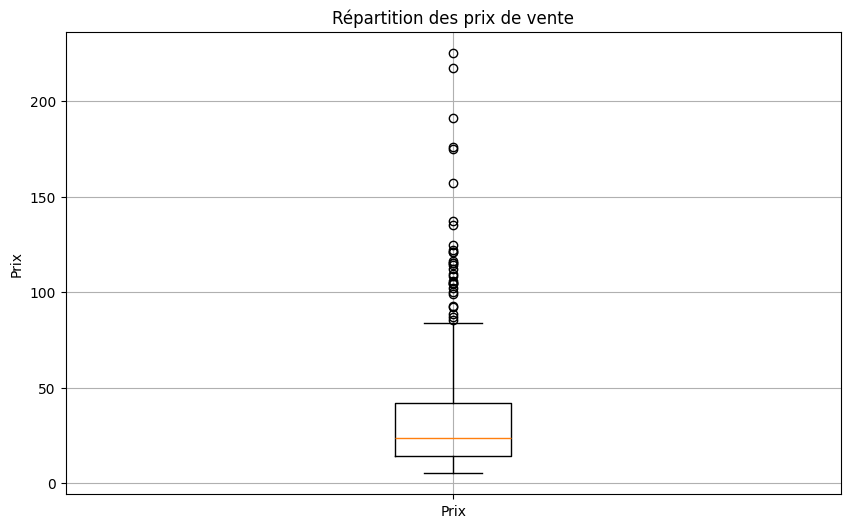

In [ ]:
#Création d'une Boite à moustache de la répartition des prix grâce à Pandas
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.boxplot(df_merge_web['price'])
plt.title('Répartition des prix de vente')
plt.ylabel('Prix')
plt.xticks([1], ['Prix'])
plt.grid()
plt.show()

In [ ]:
#Autre méthode avec plotly express
fig = px.box(df_merge_web, y='price', title='Répartition des prix de vente')
fig.update_layout(yaxis_title='Prix')
fig.show()


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utisation de méthodes statistique</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [ ]:
#Calculer la moyenne du prix
mean_price = round(df_merge_web['price'].mean(), 2)
print(f"Moyenne du prix : {mean_price} €")

#Calculer l'écart-type du prix
std_dev_price = round(df_merge_web['price'].std(), 2)
print(f'Écart type du prix : {std_dev_price} €')

#Calculer le Z-score
df_merge_web['z_score'] = (df_merge_web['price'] - mean_price) / std_dev_price
print(df_merge_web[['price', 'z_score']])



Moyenne du prix : 32.33 €
Écart type du prix : 27.6 €
      price   z_score
0     24.20 -0.294565
1     34.30  0.071377
2     20.80 -0.417754
3     14.10 -0.660507
4     46.00  0.495290
5     34.30  0.071377
6     32.70  0.013406
7     31.20 -0.040942
8     60.00  1.002536
9     42.60  0.372101
10    80.00  1.727174
11    18.30 -0.508333
12    22.80 -0.345290
13    19.30 -0.472101
14    21.80 -0.381522
15     7.70 -0.892391
16    33.70  0.049638
17    44.30  0.433696
18    71.60  1.422826
19    12.70 -0.711232
20     8.70 -0.856159
21     8.70 -0.856159
22     8.70 -0.856159
23    11.90 -0.740217
24    11.90 -0.740217
25    14.50 -0.646014
26    14.40 -0.649638
27    19.50 -0.464855
28    20.80 -0.417754
29    22.00 -0.374275
30    16.60 -0.569928
31    60.00  1.002536
32    23.40 -0.323551
33    33.20  0.031522
34    32.00 -0.011957
35    77.80  1.647464
36    12.70 -0.711232
37    14.70 -0.638768
38    14.05 -0.662319
39    22.90 -0.341667
40    44.00  0.422826
41    37.00  0.169203


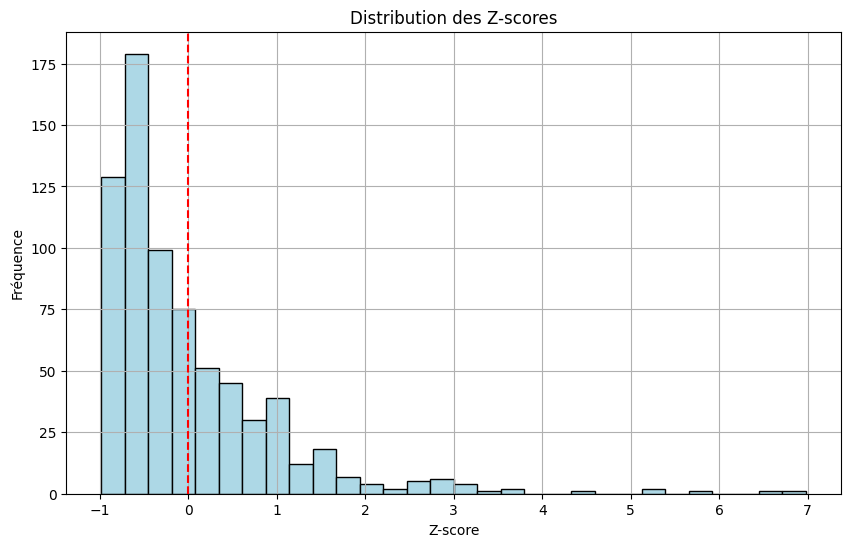

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_merge_web['z_score'], bins=30, color='lightblue', edgecolor='black')
plt.title('Distribution des Z-scores')
plt.xlabel('Z-score')
plt.ylabel('Fréquence')
plt.axvline(0, color='red', linestyle='--')  # Ligne de la moyenne (z-score = 0)
plt.grid(True)
plt.show()

In [ ]:
fig = px.box(df_merge_web, y='z_score', title='Boxplot des Z-scores', color_discrete_sequence=['black'])
fig.update_layout(yaxis_title='Z-score')
fig.show()

In [ ]:
#Quel est le seuil prix dont z-score est supérieur à 3?
seuil_prix = df_merge_web.loc[df_merge_web['z_score'] > 3, 'price'].min()

print(f"Le seuil prix dont le z-score est supérieur à 3 est de {seuil_prix} €")


Le seuil prix dont le z-score est supérieur à 3 est de 116.4 €


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'interval interquartile</h3>
</div>

In [ ]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions
df_merge_web.describe()

,product_id,onsale_web,price,stock_quantity,purchase_price,total_sales,post_date,post_modified,z_score
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714,714,714.000000
mean,5032.557423,0.998599,32.333683,23.446779,16.904006,8.516807,2018-08-22 03:57:52.950980608,2020-06-20 21:45:25.694677760,0.000133
min,3847.000000,0.000000,5.200000,0.000000,2.740000,0.000000,2018-02-08 12:58:52,2018-02-20 15:19:23,-0.982971
25%,4280.250000,1.000000,14.062500,9.000000,7.240000,5.000000,2018-02-27 20:01:12.500000,2020-06-18 18:32:35,-0.661866
50%,4796.000000,1.000000,23.450000,20.000000,12.305000,8.000000,2018-04-19 14:52:10,2020-08-04 09:30:06.500000,-0.321739
75%,5710.500000,1.000000,42.075000,30.000000,22.030000,11.000000,2019-01-31 14:35:47,2020-08-25 10:32:32,0.353080
max,7338.000000,1.000000,225.000000,145.000000,137.810000,122.000000,2020-07-20 11:00:00,2020-08-27 18:55:03,6.980797
std,790.510878,0.037424,27.596332,22.217795,14.827384,8.151639,NaN,NaN,0.999867


In [ ]:
#Définissez un seuil pour les articles "outliers" en prix

#Calcul de Q1 et Q3
q1 = df_merge_web['price'].quantile(0.25)
q3 = df_merge_web['price'].quantile(0.75)

#Calcul de l'IQR
iqr = q3 - q1

#Calcul des limites
limite_inferieure = round(q1 - (1.5 * iqr),2)
limite_superieure = round(q3 + (1.5 * iqr),2)

print(f"Limite inférieure : {limite_inferieure} €")
print(f"Limite supérieure : {limite_superieure} €")

Limite inférieure : -27.96 €
Limite supérieure : 84.09 €


In [ ]:
#Contexte commercial : le prix des articles ne peut pas être négatif
#Fixation de la limite inférieure à max 0
limite_inferieure = max(0, round(q1 - (1.5 * iqr), 2))
print(f"Limite inférieure : {limite_inferieure} €")

Limite inférieure : 0 €


In [ ]:
#Définissez le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"
outliers = df_merge_web.loc[(df_merge_web['price'] < limite_inferieure) | (df_merge_web['price'] > limite_superieure)]

# Afficher le nombre d'articles outliers
nombre_outliers = outliers.shape[0]
print("Nombre d'articles outliers :", nombre_outliers)

# Calculer la proportion par rapport à l'ensemble du catalogue
proportion_outliers = round((nombre_outliers / df_merge_web.shape[0]) *100,2)
print("Pourcentage d'articles outliers :", proportion_outliers,"%")


Nombre d'articles outliers : 31
Pourcentage d'articles outliers : 4.34 %


In [ ]:
#Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible ?
#Calculer le taux de marge des outliers et des non-outliers et les comparer
#Justifiés, ce sont surement des produits de luxe / rare / marque spécifique ect
outliers

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,sku,total_sales,product_type,post_title,post_date,post_modified,z_score
63,4115,1,100.0,12,instock,52.70,15382,1.0,Vin,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,2018-02-13 11:08:45,2020-02-08 11:45:02,2.451812
65,4132,1,88.4,7,instock,44.30,11668,5.0,Vin,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...,2018-02-13 11:43:55,2020-02-20 09:55:02,2.031522
199,4352,1,225.0,0,outofstock,137.81,15940,11.0,Champagne,Champagne Egly-Ouriet Grand Cru Millésimé 2008,2018-03-02 10:30:04,2020-03-07 11:18:45,6.980797
205,4359,1,85.6,112,instock,51.93,13853,7.0,Champagne,Champagne Larmandier-Bernier Grand Cru Les Che...,2018-03-02 11:11:48,2019-12-23 09:30:11,1.930072
218,4402,1,176.0,11,instock,78.25,3510,3.0,Cognac,Cognac Frapin VIP XO,2018-03-22 11:21:05,2020-08-22 11:35:03,5.205435
219,4404,1,108.5,17,instock,52.22,3507,4.0,Cognac,Cognac Frapin Château de Fontpinot XO,2018-03-22 11:32:55,2020-08-12 09:30:16,2.759783
221,4406,1,157.0,12,instock,69.08,7819,4.0,Cognac,Cognac Frapin Château de Fontpinot 1989 20 Ans...,2018-03-22 11:42:48,2020-03-14 16:05:04,4.517029
222,4407,1,104.0,14,instock,46.71,3509,5.0,Cognac,Cognac Frapin Cigar Blend,2018-03-22 11:49:53,2020-07-04 09:45:03,2.596739
227,4582,1,109.6,18,instock,53.80,12857,1.0,Vin,Château de Meursault Puligny-Montrachet 1er Cr...,2018-04-12 17:56:13,2020-02-06 16:35:02,2.799638
380,4903,1,102.3,12,instock,51.80,14805,2.0,Vin,Domaine Des Croix Corton Grand Cru Les Grèves ...,2018-05-15 10:10:57,2020-06-27 09:00:07,2.535145


In [ ]:
outliers['taux_marge'] = ((outliers['price'] - outliers['purchase_price']) / outliers['purchase_price']) * 100

# Afficher le DataFrame avec la colonne du taux de marge pour les outliers
print(outliers[['price', 'purchase_price', 'taux_marge']])

     price  purchase_price  taux_marge
63   100.0           52.70   89.753321
65    88.4           44.30   99.548533
199  225.0          137.81   63.268268
205   85.6           51.93   64.837281
218  176.0           78.25  124.920128
219  108.5           52.22  107.774799
221  157.0           69.08  127.272727
222  104.0           46.71  122.650396
227  109.6           53.80  103.717472
380  102.3           51.80   97.490347
381  137.0           67.95  101.618837
426  217.5          116.87   86.104218
431  105.0           55.88   87.902649
432  105.0           56.42   86.104218
437  112.0           68.60   63.265306
438   86.8           50.13   73.149810
502   92.0           46.11   99.522880
511  124.8           66.41   87.923505
553  175.0           90.42   93.541252
587  191.3          116.06   64.828537
602   93.0           40.49  129.686342
603  122.0           54.24  124.926254
604  114.0           52.25  118.181818
642  135.0           80.33   68.056766
647  105.6           57.2

<ipython-input-76-95f3bc1673ca>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Étape 1 : Filtrer les produits non-outliers
non_outliers = df_merge_web.loc[(df_merge_web['price'] >= limite_inferieure) & (df_merge_web['price'] <= limite_superieure)]

# Étape 2 : Sélectionner un échantillon aléatoire de 10 produits
# Assurez-vous que le DataFrame 'non_outliers' contient au moins 10 produits
sample_non_outliers = non_outliers.sample(n=10, random_state=1)

# Étape 3 : Calculer le taux de marge pour ces 10 produits
sample_non_outliers['taux_marge'] = ((sample_non_outliers['price'] - sample_non_outliers['purchase_price']) / sample_non_outliers['purchase_price']) * 100

# Afficher le DataFrame avec la colonne du taux de marge
print(sample_non_outliers[['price', 'purchase_price', 'taux_marge']])

     price  purchase_price  taux_marge
445   59.9           30.95   93.537964
23    11.9            6.33   87.993681
191    8.1            4.19   93.317422
47    14.4            7.81   84.379001
370   27.9           14.85   87.878788
613   15.4            7.72   99.481865
576   16.6            9.01   84.239734
471   19.8           10.43   89.837009
644   10.6            5.64   87.943262
517   71.3           36.84   93.539631


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univarié du CA, des quantités vendues, des stocks et de la marge ainsi qu'une analyse multivarié  </h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [ ]:
##############################
# Calculer le CA su site web #
##############################

#Créez une colonne calculant le CA par article
df_merge_web['ca_par_article'] = df_merge_web['price'] * df_merge_web['total_sales']

#Calculez la somme de la colonne "ca_par_article"
ca_total = "{:,.1f}".format(df_merge_web['ca_par_article'].sum()).replace(',', ' ')

#Ce résultat correspond au chiffre d'affaire du site web
print(f"Chiffre d'affaire du site web : {ca_total} €")


Chiffre d'affaire du site web : 153 748.1 €


In [ ]:
###############################
# Palmares des articles en CA #
###############################

#Effectuer le tri dans l'ordre décroissant du CA du dataset df_merge
df_ca = df_merge_web.sort_values(by='ca_par_article', ascending=False)

#Réinitialiser l'index du dataset par un reset_index
df_ca= df_ca.reset_index(drop=True)

#Afficher les 20 premier articles en CA
df_ca.head(20)

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,sku,total_sales,product_type,post_title,post_date,post_modified,z_score,ca_par_article
0,4150,1,59.0,123,instock,35.45,1366,116.0,Champagne,Champagne Mailly Grand Cru Intemporelle 2010,2018-02-13 13:45:31,2020-08-26 18:05:02,0.966304,6844.0
1,4352,1,225.0,0,outofstock,137.81,15940,11.0,Champagne,Champagne Egly-Ouriet Grand Cru Millésimé 2008,2018-03-02 10:30:04,2020-03-07 11:18:45,6.980797,2475.0
2,4726,1,12.7,0,outofstock,6.82,14950,122.0,Vin,François Baur Pinot Noir Schlittweg 2017,2018-04-18 11:53:51,2020-05-06 11:35:01,-0.711232,1549.4
3,5067,1,59.9,3,instock,30.95,15346,22.0,Vin,Albert Mann Pinot Noir Grand H 2017,2018-07-31 11:49:05,2020-02-13 17:00:01,0.998913,1317.8
4,5379,1,11.1,33,instock,5.68,14561,111.0,Vin,Argentine Mendoza Alamos Torrontes 2017,2018-09-01 15:34:55,2020-07-11 14:00:03,-0.769203,1232.1
5,5892,1,191.3,98,instock,116.06,14983,6.0,Champagne,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,2019-03-28 10:21:36,2020-04-01 09:30:09,5.759783,1147.8
6,4353,1,79.5,127,instock,45.91,12587,14.0,Champagne,Champagne Egly-Ouriet Grand Cru Brut Rosé,2018-03-02 10:37:26,2020-08-22 11:45:02,1.709058,1113.0
7,5826,1,41.2,34,instock,21.71,15325,20.0,Vin,Agnès Levet Côte Rôtie Améthyste 2017,2019-03-27 17:59:49,2020-05-21 14:00:02,0.321377,824.0
8,6212,1,115.0,16,instock,59.42,13996,7.0,Vin,Domaine des Comtes Lafon Volnay 1er Cru Santen...,2019-07-25 09:09:17,2020-06-16 09:30:16,2.995290,805.0
9,5026,1,86.8,101,instock,50.13,13913,9.0,Champagne,Champagne Agrapart &amp; Fils Minéral Extra Br...,2018-07-18 10:46:30,2020-05-11 14:35:02,1.973551,781.2


In [ ]:
#Graphique en barre des 20 premiers articles avec plotly express
top_20_articles = df_ca.head(20)

# Convertir product_id en string pour un affichage catégoriel
top_20_articles['product_id'] = top_20_articles['product_id'].astype(str)

# Création du graphique en barres
fig = px.bar(top_20_articles,
             x='product_id',
             y='ca_par_article',
             title="Top 20 des articles par chiffre d'affaires",
             labels={'product_id': 'ID Produit', 'ca_par_article': 'Chiffre d’Affaires'},
             )

# Améliorer la lisibilité
fig.update_layout(xaxis={'categoryorder':'total descending'})

# Affichage du graphique
fig.show()

<ipython-input-80-cc09bf556efd>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part du CA de la ligne dans le dataset
df_ca['part_ca'] = df_ca['ca_par_article'] / df_ca['ca_par_article'].sum()

#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_ca['cumsum_ca'] = df_ca['part_ca'].cumsum()

#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA
num_articles_80 = df_ca[df_ca['cumsum_ca'] <= 0.8].shape[0]

#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
total_articles = df_ca.shape[0]  # Nombre total d'articles
proportion_80_articles = num_articles_80 / total_articles * 100

print ("Le nombre d'articles représentant 80% du CA est de " ,num_articles_80)
print(f"Proportion des articles représentant 80% du CA : {proportion_80_articles:.2f}%")

Le nombre d'articles représentant 80% du CA est de  420
Proportion des articles représentant 80% du CA : 58.82%


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en Quantités</h3>
</div>

In [ ]:
#####################################
# Palmares des articles en quantité #
#####################################

#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_merge
df_sales = df_merge_web.sort_values(by='total_sales', ascending=False)

#Réinitialiser l'index du dataset par un reset_index
df_sales= df_sales.reset_index(drop=True)

#Afficher les 20 premier articles en quantité
df_sales.head(20)

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,sku,total_sales,product_type,post_title,post_date,post_modified,z_score,ca_par_article
0,4726,1,12.7,0,outofstock,6.82,14950,122.0,Vin,François Baur Pinot Noir Schlittweg 2017,2018-04-18 11:53:51,2020-05-06 11:35:01,-0.711232,1549.4
1,4150,1,59.0,123,instock,35.45,1366,116.0,Champagne,Champagne Mailly Grand Cru Intemporelle 2010,2018-02-13 13:45:31,2020-08-26 18:05:02,0.966304,6844.0
2,5379,1,11.1,33,instock,5.68,14561,111.0,Vin,Argentine Mendoza Alamos Torrontes 2017,2018-09-01 15:34:55,2020-07-11 14:00:03,-0.769203,1232.1
3,4867,1,9.9,121,instock,4.86,16148,36.0,Vin,Château De La Selve IGP Coteaux de l'Ardèche M...,2018-05-03 13:20:05,2020-08-27 09:30:15,-0.812681,356.4
4,4203,1,9.9,74,instock,5.01,15415,27.0,Vin,Mas Laval IGP Pays d'Hérault Les Pampres Blanc...,2018-02-15 14:33:42,2020-07-11 16:45:03,-0.812681,267.3
5,4275,1,14.9,62,instock,7.78,14864,24.0,Vin,I Fabbri Chianti Classico Lamole 2017,2018-02-27 13:33:54,2020-08-22 14:35:02,-0.631522,357.6
6,5067,1,59.9,3,instock,30.95,15346,22.0,Vin,Albert Mann Pinot Noir Grand H 2017,2018-07-31 11:49:05,2020-02-13 17:00:01,0.998913,1317.8
7,4647,1,28.5,45,instock,14.14,16525,22.0,Vin,Bernard Baudry Chinon Rouge La Croix Boissée 2017,2018-04-17 09:28:58,2020-07-31 09:31:39,-0.138768,627.0
8,6129,1,5.2,68,instock,2.74,14570,20.0,Vin,Moulin de Gassac IGP Pays d'Hérault Guilhem Bl...,2019-06-28 18:01:06,2020-08-26 15:55:02,-0.982971,104.0
9,5826,1,41.2,34,instock,21.71,15325,20.0,Vin,Agnès Levet Côte Rôtie Améthyste 2017,2019-03-27 17:59:49,2020-05-21 14:00:02,0.321377,824.0


In [ ]:
#Graphique en barre des 20 premiers articles avec plotly express
top_20_ventes = df_sales.head(20)

# Convertir product_id en string pour un affichage catégoriel
top_20_ventes['product_id'] = top_20_ventes['product_id'].astype(str)

# Création du graphique en barres
fig = px.bar(top_20_ventes,
             x='product_id',
             y='total_sales',
             title="Top 20 des articles par ventes totales",
             labels={'product_id': 'ID Produit', 'total_sales': 'Ventes totales'},
             )

# Améliorer la lisibilité
fig.update_layout(xaxis={'categoryorder':'total descending'})

# Affichage du graphique
fig.show()

<ipython-input-98-0e3462e42143>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part en quantité de la ligne dans le dataset
df_sales['part_sales'] = df_sales['total_sales'] / df_sales['total_sales'].sum()

#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_sales['cumsum_sales'] = df_sales['part_sales'].cumsum()

#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité
nb_product_80 = df_sales[df_sales['cumsum_sales'] <= 0.8].shape[0]

#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
total_articles = df_sales.shape[0]  # Nombre total d'articles
proportion_80_articles = nb_product_80 / total_articles * 100

print ("Le nombre d'articles représentant 80% des ventes en quantité est de " ,nb_product_80)
print(f"Proportion des articles représentant 80% des ventes en quantité : {proportion_80_articles:.2f}%")


Le nombre d'articles représentant 80% des ventes en quantité est de  424
Proportion des articles représentant 80% des ventes en quantité : 59.38%


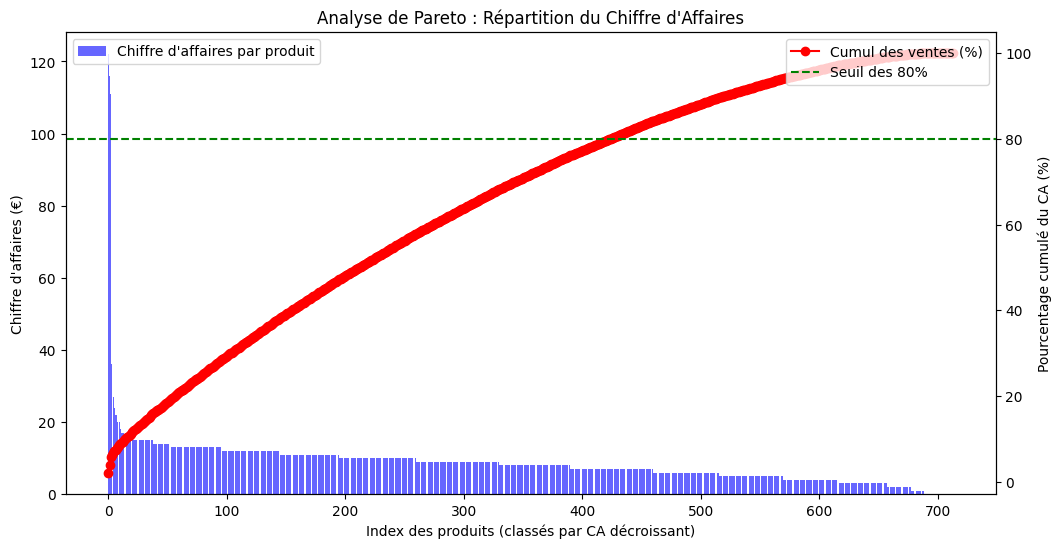

In [ ]:
# Trier les produits par chiffre d'affaires décroissant
df_sales = df_sales.sort_values(by='total_sales', ascending=False)

# Convertir product_id en string pour affichage catégoriel
df_sales['product_id'] = df_sales['product_id'].astype(str)

# Calculer la somme cumulative des ventes en %
df_sales['cumsum_sales'] = df_sales['total_sales'].cumsum()
df_sales['cumsum_sales_pct'] = df_sales['cumsum_sales'] / df_sales['total_sales'].sum() * 100

# Axe des X : Produits (index)
x = np.arange(len(df_sales))

fig, ax1 = plt.subplots(figsize=(12, 6))

# Histogramme pour représenter les ventes individuelles
ax1.bar(x, df_sales['total_sales'], color='blue', alpha=0.6, label="Chiffre d'affaires par produit")

# Axe Y secondaire pour la courbe cumulative
ax2 = ax1.twinx()
ax2.plot(x, df_sales['cumsum_sales_pct'], color='red', marker='o', linestyle='-', label="Cumul des ventes (%)")

# Tracer la ligne des 80 %
ax2.axhline(y=80, color='green', linestyle='--', label="Seuil des 80%")

# Labels et légendes
ax1.set_xlabel("Index des produits (classés par CA décroissant)")
ax1.set_ylabel("Chiffre d'affaires (€)")
ax2.set_ylabel("Pourcentage cumulé du CA (%)")

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.title("Analyse de Pareto : Répartition du Chiffre d'Affaires")
plt.xticks(rotation=45)  # Incliner les étiquettes des produits pour lisibilité
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Analyse des stocks</h3>
</div>

In [ ]:
######################################
# Calcule le nombre de mois de stock #
######################################

#Import de numpy
import numpy as np

#Création de la colonne Rotation de stock
df_merge_web['rotation_stock'] = df_merge_web['stock_quantity'] / df_merge_web['total_sales']

#Remplacement des "inf" par 0
df_merge_web['rotation_stock'].replace([np.inf, -np.inf], 0, inplace=True)

#Effectuer le tri dans l'ordre décroissant du nombre de mois de stock dans le dataset df_merge
df_stock = df_merge_web.sort_values(by='rotation_stock', ascending=False)

#Graphique en barre du flop 20 des produits qui ont le plus de mois de stock
top_20_flop = df_stock.head(20)

top_20_flop['product_id'] = top_20_flop['product_id'].astype(str)

fig = px.bar(top_20_flop,
             x='product_id',
             y='rotation_stock',
             title= " Top 20 des produits les plus longs à écouler",
             labels={'product_id': 'ID Produit', 'rotation_stock': 'Rotation du stock (en mois)'})

# Améliorer la lisibilité
fig.update_layout(xaxis={'categoryorder': 'total descending'})

# Affichage du graphique
fig.show()

<ipython-input-86-ec699d9e9da9>:12: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-86-ec699d9e9da9>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_stock.head(20)

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,sku,total_sales,product_type,post_title,post_date,post_modified,z_score,ca_par_article,rotation_stock
70,4142,1,53.0,125,instock,32.15,11641,4.0,Champagne,Champagne Gosset Grand Millésime 2006,2018-02-13 13:08:44,2020-08-20 09:30:03,0.748913,212.0,31.250000
642,6126,1,135.0,138,instock,80.33,14923,5.0,Champagne,Champagne Gosset Célébris Vintage 2007,2019-06-28 17:22:27,2020-08-27 11:45:02,3.719928,675.0,27.600000
202,4356,1,51.6,81,instock,31.00,12585,3.0,Champagne,Champagne Egly-Ouriet Premier Cru Les Vignes d...,2018-03-02 10:51:14,2020-07-30 11:25:02,0.698188,154.8,27.000000
197,4348,1,59.0,125,instock,34.76,12586,5.0,Champagne,Champagne Egly-Ouriet Grand Cru Brut Tradition,2018-03-02 09:22:39,2020-08-12 14:00:02,0.966304,295.0,25.000000
74,4148,1,37.5,71,instock,21.88,1364,3.0,Champagne,Champagne Mailly Grand Cru Brut Rosé,2018-02-13 13:36:44,2020-08-08 10:45:03,0.187319,112.5,23.666667
203,4357,1,39.0,115,instock,22.30,9562,5.0,Champagne,Champagne Larmandier-Bernier Latitude,2018-03-02 10:57:02,2018-12-28 15:10:04,0.241667,195.0,23.000000
71,4144,1,49.0,91,instock,27.73,1662,4.0,Champagne,Champagne Gosset Grand Rosé,2018-02-13 13:17:25,2020-08-14 16:45:03,0.603986,196.0,22.750000
437,5025,1,112.0,136,instock,68.60,13914,6.0,Champagne,Champagne Agrapart &amp; Fils L'Avizoise Extra...,2018-07-18 10:39:43,2020-07-09 17:05:02,2.886594,672.0,22.666667
198,4350,1,79.5,145,instock,47.30,12588,7.0,Champagne,Champagne Egly-Ouriet Grand Cru Extra Brut V.P.,2018-03-02 10:00:02,2020-08-27 11:45:02,1.709058,556.5,20.714286
194,4334,1,49.0,142,instock,30.01,7818,7.0,Champagne,Champagne Gosset Grand Blanc de Blancs,2018-03-01 14:02:44,2020-08-12 14:00:03,0.603986,343.0,20.285714


In [ ]:
####################################
# Valorisation des stocks en euros #
####################################

#Création de la colonne Valorisation des stocks en euros
df_stock['stock_euros'] = df_stock['stock_quantity'] * df_stock['price']

#Calculer la somme de la colonne "Valorisation_stock_euros"
stock_euros_total = "{:,.1f}".format(df_stock['stock_euros'].sum()).replace(',', ' ')

print(f"Valeur marchande de l'inventaire : {stock_euros_total} €")

Valeur marchande de l'inventaire : 494 682.4 €


In [ ]:
##############################################
# Valorisation du nombre de produit en stock #
##############################################

#Calculer la somme de la colonne stock quantity
stock_quantity_total = df_stock['stock_quantity'].sum()

print(f"Nombre de produits en stock : {stock_quantity_total}")

Nombre de produits en stock : 16741


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.4 - Analyse du taux de marge</h3>
</div>

In [ ]:
############################
# Analyse du taux de marge #
############################
taux_tva = 0.20

#Création de la colonne prix HT
df_merge_web['prix_ht'] = round(df_merge_web['price'] / (1 + taux_tva),2)

#Création de la colonne Taux de marge
df_merge_web['taux_marge'] = round(((df_merge_web['prix_ht'] - df_merge_web['purchase_price']) / df_merge_web['purchase_price']) * 100,2)

#Afficher le prix minimum de la colonne "taux_marge"
prix_minimum = df_merge_web['taux_marge'].min()
print("Prix minimum de la colonne 'taux_marge' :", prix_minimum, "%")

#Afficher le prix maximum de la colonne "taux_marge"
prix_maximum = df_merge_web['taux_marge'].max()
print("Prix maximum de la colonne 'taux_marge' :", prix_maximum, "%")

Prix minimum de la colonne 'taux_marge' : -86.4 %
Prix maximum de la colonne 'taux_marge' : 91.41 %


In [ ]:
#affichage de la ligne avec un taux de marge inférieur à 0
ligne_taux_marge_negatif = df_merge_web.loc[df_merge_web['taux_marge'] < 0]

ligne_taux_marge_negatif

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,sku,total_sales,product_type,post_title,post_date,post_modified,z_score,ca_par_article,rotation_stock,prix_ht,taux_marge
201,4355,1,12.65,97,instock,77.48,12589,0.0,Champagne,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,2018-03-02 10:46:10,2020-08-13 10:15:02,-0.713043,0.0,0.0,10.54,-86.4


In [ ]:
#création d'un dataframe avec les taux positifs
df_taux_positif = df_merge_web.loc[df_merge_web['taux_marge'] > 0]

#Afficher le prix minimum de la colonne "taux_marge"
prix_minimum = df_taux_positif['taux_marge'].min()
print("Taux minimum de la colonne 'taux_marge' :", prix_minimum, "%")

#Afficher le prix maximum de la colonne "taux_marge"
prix_maximum = df_taux_positif['taux_marge'].max()
print("Taux maximum de la colonne 'taux_marge' :", prix_maximum, "%")


Taux minimum de la colonne 'taux_marge' : 29.54 %
Taux maximum de la colonne 'taux_marge' : 91.41 %


In [ ]:
#création d'un dataframe avec le taux de marge moyen par type de produit
taux_marge_moyen_par_type = df_merge_web.groupby('product_type')['taux_marge'].mean().reset_index()

taux_marge_moyen_par_type

,product_type,taux_marge
0,Autre,56.620000
1,Champagne,35.440714
2,Cognac,82.320000
3,Gin,74.830000
4,Huile d'olive,33.406667
5,Vin,61.496657
6,Whisky,81.742857


In [ ]:
#Affichage dans un graphique du taux de marge par type de produit
# Créer un graphique en barre du taux de marge moyen par type de produit
fig = px.bar(taux_marge_moyen_par_type,
             x='product_type',
             y='taux_marge',
             title="Taux de marge moyen par type de produit",
             labels={'product_type': 'Type de produit', 'taux_marge': 'Taux de marge (%)'},
             color='product_type',  # Ajouter des couleurs différentes pour chaque type de produit
             color_discrete_sequence=px.colors.qualitative.Set3)  # Choix des couleurs

# Afficher le graphique
fig.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.5 - Analyse des correlations entre les variables stock, sales et price</h3>
</div>

<Axes: >

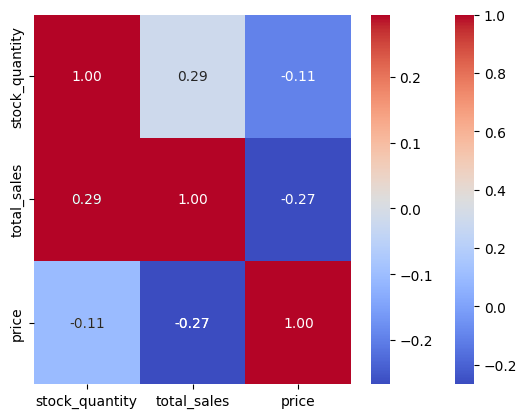

In [ ]:
############################
# Analyse des correlations #
############################

#Importation de Seaborn
import seaborn as sns

#Création d'un heatmap de correlation avec les variables stock, sales et price
#on peut également créer un mask pour n'afficher qu'une demi heatmap

# Création d'une heatmap de corrélation
sns.heatmap(df_merge_web[['stock_quantity', 'total_sales', 'price']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
# Création d'un mask pour n'afficher qu'une demi heatmap
mask = np.triu(np.ones_like(df_merge_web[['stock_quantity', 'total_sales', 'price']].corr(), dtype=bool))

# Création de la heatmap avec le mask
sns.heatmap(df_merge_web[['stock_quantity', 'total_sales', 'price']].corr(), annot=True, cmap='coolwarm', fmt='.2f', mask=mask)


In [ ]:
#Que peut-on conclure des correlations ?
# Les ventes et les prix sont négativement corrélés → les produits chers ont tendance à moins se vendre.
# Les stocks et les ventes sont faiblement corrélés positivement → un stock plus important ne garantit pas forcément des ventes élevées.
# Le prix et le stock n'ont presque aucun lien direct.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.6 - Mettre à disposition la nouvelle table sur un fichier Excel</h3>
</div>

In [ ]:
#Mettre le dataset df_merge sur un fichier Excel
#Cette étape peut-être utile pour partager le résultat du dataset obtenu pour le partager avec les équipes.

#Modification de l'ordre des colonnes
nouvel_ordre = ['product_id','sku','onsale_web','price','prix_ht','purchase_price','taux_marge','total_sales','ca_par_article','stock_quantity','stock_status','rotation_stock','product_type','z_score','post_title','post_date','post_modified']
df_merge_web = df_merge_web[nouvel_ordre]
df_merge_web.to_excel('df_merge_web.xlsx', index=False)
